# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

* Задачи: 
    - провести исследовательский анализ данных
    - установить параметры, влияющие на цену объектов

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

  # Описание данных
 
 Будем оперировать следующими величинами:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

# Проделанные этапы:
Изучены следующие параметры: площадь, цена, число комнат, высота потолков  
Описаны и удалены аномалии  
Построены гистограммы для каждого параметра  
Изучено нормальное время продажи квартиры  
Изучено, какие факторы больше влияют на стоимость квартиры?   
Изучено, зависит ли цена от квадратного метра, числа комнат, удалённости от центра  
Изучена зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом  
Также изучена зависимость от даты размещения: дня недели, месяца и года.  
Выбраны 10 населённых пунктов с наибольшим числом объявлений. Посчитана средняя цена квадратного метра в этих населённых  пунктах. Выделены населённые пункты с самой высокой и низкой стоимостью жилья.  
Выделены квартиры в Санкт-Петербурге. Выяснено какая область входит в центр. Посчитана средняя цена для каждого километра.   Построены графики зависимости цены от удалённости от центра. Определена граница центральной зоны.  
Выделен сегмент квартир в центре. Выделены факторы, которые влияют на стоимость квартиры.  

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


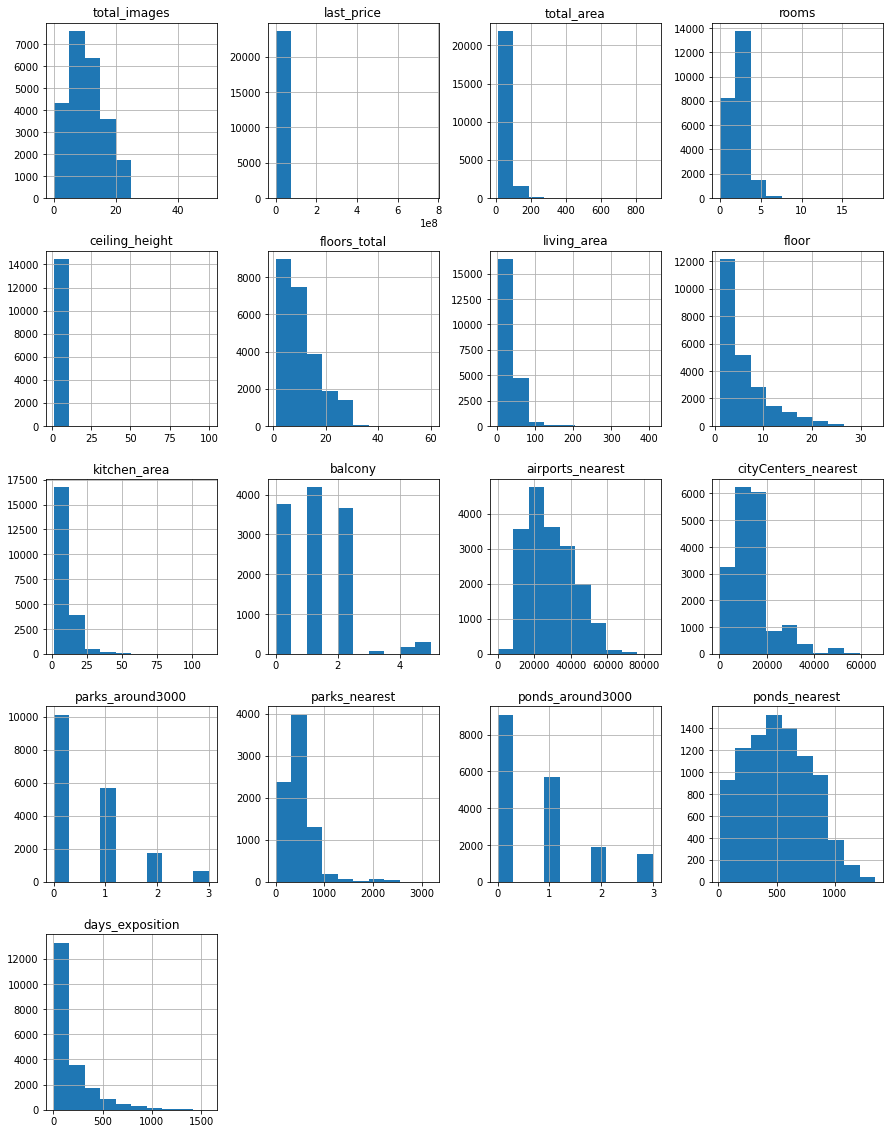

In [3]:
df.hist(figsize=(15, 20));

Что-то странное с last_price, ceiling_height скорее всего аномалии  
Так же длинные хвосты у total_area и rooms  
Попробую сразу избавиться от подозрительных хвостов.

In [4]:
df = df.query('last_price<50000000 and total_area < 300 and rooms < 10 and living_area <200 \
              and kitchen_area < 50 and floors_total<40')

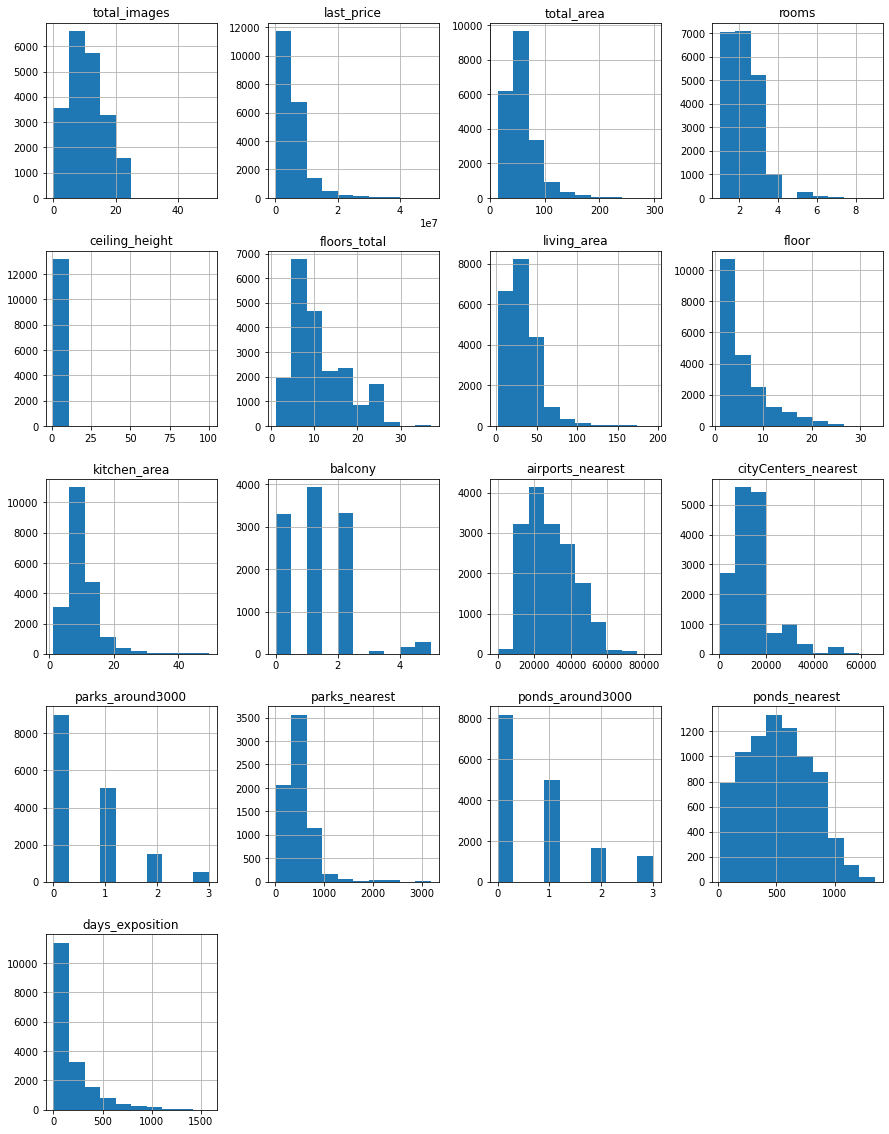

In [5]:
df.hist(figsize=(15, 20));

### Предобработка данных

Заполняем пропущенные значения  
Переводим данные в нужный формат

In [6]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
df['balcony'] = df['balcony'].fillna(0)
print(df['is_apartment'].value_counts())
df = df.drop(columns=['is_apartment'])
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1D')

print(df.info())

False    2486
True       31
Name: is_apartment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20765 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20765 non-null  int64         
 1   last_price            20765 non-null  float64       
 2   total_area            20765 non-null  float64       
 3   first_day_exposition  20765 non-null  datetime64[ns]
 4   rooms                 20765 non-null  int64         
 5   ceiling_height        13209 non-null  float64       
 6   floors_total          20765 non-null  float64       
 7   living_area           20765 non-null  float64       
 8   floor                 20765 non-null  int64         
 9   studio                20765 non-null  bool          
 10  open_plan             20765 non-null  bool          
 11  kitchen_area          20765 non-null  float64       
 12  balcony      

In [7]:
df.query('floors_total < floor')['floors_total'].sum()

0.0

Решено избавиться от строк с неизвестными в ключевых критериях - площадь объекта, площадь кухни и местонахождение, поскольку заполнить их другими данными невозможно, а пропусков не слишком много.  
Пропуски в столбце с балконами заполнили нулями, преположив, что причина отсутствия данных в отсутствии балкона.  
Пропуски в общем кол-ве этажей заполнил медианой, чтоб не выбивались из общего ряда (их там немного). Провели проверку на превышение номера этажа общей этажности дома.  
Во всем столбце "аппартаменты" лишь 33 значения "да", и заполнить их также нечем, поэтому удалил весь столбец.     
**Запрос: большое кол-во пропусков в столбце "ceiling_height" и в географических данных (расстояния до аэропорта, центра, парка, пруда, кол-во парков и прудов в 3000км.)**

Приводим названия населенных пунктов к единому формату - убираем тип НП, оставляем название.

In [8]:
print(df['locality_name'].duplicated().sum())
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'].unique()



20419


array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'колпино', 'гатчина',
       'поселок мурино', 'деревня фёдоровское', 'выборг', 'кронштадт',
       'кировск', 'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'деревня старая',
       'деревня лесколово', 'село путилово', 'ивангород', 'мурино',
       'сланцы', 'шлиссельбург', 'сясьстрой', 'никольское', 'зеленогорск',
       'сосновый бор',

In [9]:
replace_dict = {
    "посёлок при железнодорожной станции ": "",
    'посёлок ':"",
    "городского типа " : "",
    "пгт ": "",
    'городской ': "",
    'коттеджный ': "",
    "деревня ": "",
    "поселок ": "",
    "садоводческое некоммерческое товарищество ": "",
    "садовое товарищество ": "",
    "село ": ""   
}

In [10]:
def apply_replace_dict(text):
    for key, value in replace_dict.items():
        text = text.replace(key, value)
        
    return text

In [11]:
df['locality_name'] = df['locality_name'].astype('str').apply(apply_replace_dict)
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'колпино', 'гатчина', 'фёдоровское', 'выборг', 'кронштадт',
       'кировск', 'новое девяткино', 'металлострой', 'лебяжье',
       'сиверский', 'молодцово', 'кузьмоловский', 'новая ропша',
       'павловск', 'пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'куттузи', 'аннино', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный', 'старая',
       'лесколово', 'путилово', 'ивангород', 'сланцы', 'шлиссельбург',
       'сясьстрой', 'никольское', 'зеленогорск', 'сосновый бор',
       'новый свет', 'оржицы', 'кальтино', 'романовка', 'бугры', 'рощино',
       'кириши', 'луга', 'волосово', 'отрадное', 'павлово', 'оредеж',
       'красный бор', 'коммунар', 'молодёжное', 'нурма', 'синявино',
       'тосно', 'стрельна', 'бокситогорск', 'александровская',
       'лопухинка', 'терволово', 'советский'

В столбце "высота полотков" около трети неизвестных, решили заполнить их медианой по этажности домов, чтобы не потерять большое количество строк.

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform("median"))
df['ceiling_height'].isna().sum()

1

Меняем единицу измерения в `last_price` на млн.руб.

In [13]:
df['last_price'] = df['last_price']/1000000

Рассмотрим взаимосвязь цены и площади помещения

<AxesSubplot:ylabel='Frequency'>

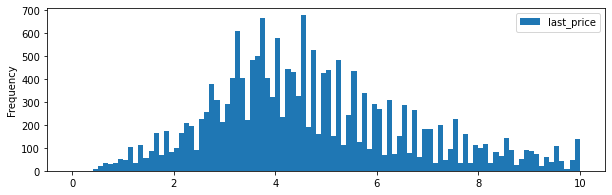

In [14]:
df.plot(y='last_price', kind='hist', range=(0, 10), bins=100, figsize=(10,3))

<AxesSubplot:ylabel='Frequency'>

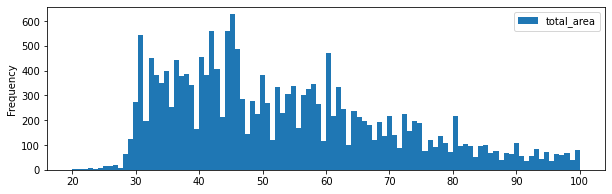

In [15]:
df.plot(y='total_area', kind='hist', range=(20, 100), bins=100, figsize=(10,3))

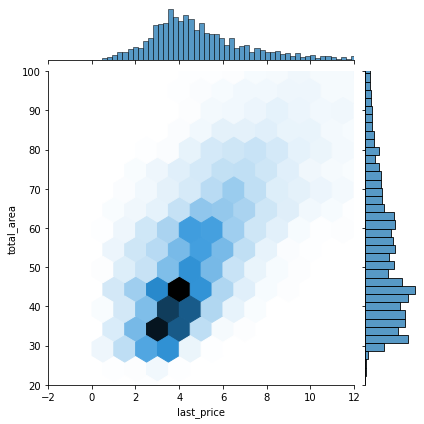

In [16]:
sns.jointplot(x='last_price',y='total_area',data=df, kind='hex', 
              xlim = (-2,12), ylim = (20,100));

Видим две самые популярные ячейки - около 3 млн. за 34 кв.м. и 4 млн. за 45 метров площади.

Внесем правки в столбец `ceiling_height` - значения больше 18 поделим на 10 на случай опечатки.

In [17]:
def ceiling_check(row):
    if 18 < row['ceiling_height']:
        return row['ceiling_height']/10
    else:
        return row['ceiling_height']
        

In [18]:
df['ceiling_height'] = df.apply(ceiling_check, axis=1)

Отбросим подозрительные объекты со слишком низкой стоимостью и длинные хвосты по гистограммам и диаграмме рассеивания

In [19]:
df = df.query('0.8 < last_price < 30 and total_area < 200 and living_area > 8 and 1.8 < ceiling_height < 5')

In [20]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,15885.000000,15903.000000,15904.000000,6970.000000,15904.000000,7787.000000,17674.000000
mean,10.054485,5.708537,57.851642,2.050915,2.698928,10.638902,33.127451,5.859728,10.184577,0.622371,28829.592572,14414.103943,0.593750,491.102439,0.745284,523.991653,183.882766
std,5.648337,3.783141,24.852768,0.969680,0.221151,6.520990,16.766912,4.830346,4.769682,0.970016,12744.543090,8642.219676,0.785096,338.737935,0.924461,277.354002,219.960787
min,0.000000,0.820000,14.000000,1.000000,2.000000,1.000000,8.300000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.500000,40.200000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,18428.000000,9682.500000,0.000000,289.000000,0.000000,303.000000,44.000000
50%,10.000000,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26786.000000,13222.000000,0.000000,456.000000,0.000000,509.000000,101.000000
75%,14.000000,6.627625,68.400000,3.000000,2.750000,15.000000,42.000000,8.000000,11.700000,1.000000,37407.000000,16318.500000,1.000000,612.000000,1.000000,734.000000,237.000000
max,50.000000,29.999000,198.100000,8.000000,4.800000,36.000000,164.700000,33.000000,49.400000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [21]:
cor = df.corr()
cor['last_price']

total_images           0.161106
last_price             1.000000
total_area             0.784720
rooms                  0.499097
ceiling_height         0.435982
floors_total           0.094603
living_area            0.669494
floor                  0.089913
studio                      NaN
open_plan                   NaN
kitchen_area           0.595616
balcony                0.030312
airports_nearest      -0.036443
cityCenters_nearest   -0.351113
parks_around3000       0.178277
parks_nearest          0.040114
ponds_around3000       0.188236
ponds_nearest         -0.100966
days_exposition        0.121882
Name: last_price, dtype: float64

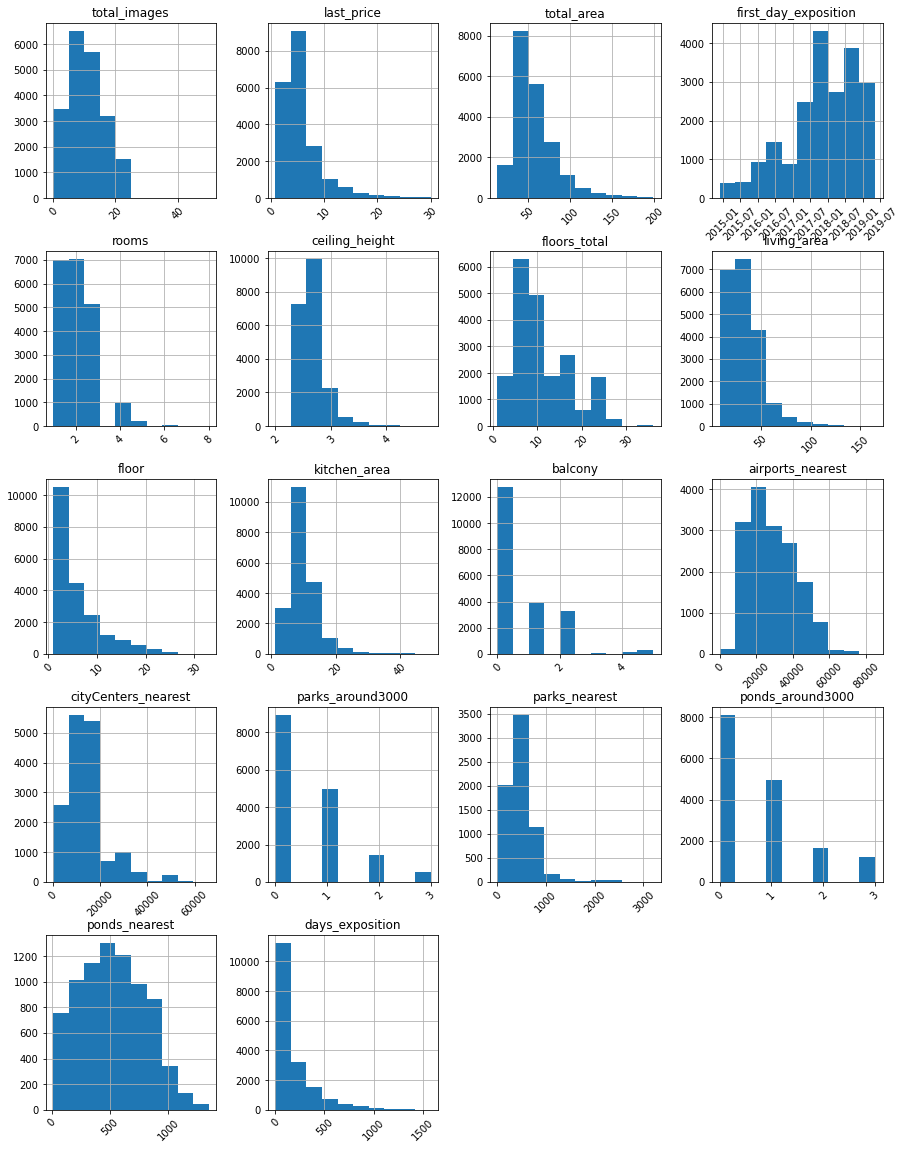

In [22]:
df.hist(figsize=(15, 20), xrot=45);

Видим вполне логичную корреляцию с ценой, гистограммы визуально тоже не смущают.  
На этом заканчиваем предобработку данных

### Посчитаем и добавим в таблицу новые столбцы

In [23]:
df.loc[:, 'meter_price'] = (df['last_price']/df['total_area']*1000)
df.loc[:, 'exposition_day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df.loc[:, 'exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df.loc[:, 'exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [24]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,exposition_day,exposition_month,exposition_year
count,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,...,15903.000000,15904.000000,6970.000000,15904.000000,7787.000000,17674.000000,20446.000000,20446.000000,20446.000000,20446.000000
mean,10.054485,5.708537,57.851642,2.050915,2.698928,10.638902,33.127451,5.859728,10.184577,0.622371,...,14414.103943,0.593750,491.102439,0.745284,523.991653,183.882766,96.551030,2.545094,6.421990,2017.356891
std,5.648337,3.783141,24.852768,0.969680,0.221151,6.520990,16.766912,4.830346,4.769682,0.970016,...,8642.219676,0.785096,338.737935,0.924461,277.354002,219.960787,33.997910,1.782773,3.467863,1.041914
min,0.000000,0.820000,14.000000,1.000000,2.000000,1.000000,8.300000,1.000000,1.300000,0.000000,...,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,10.507246,0.000000,1.000000,2014.000000
25%,6.000000,3.500000,40.200000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,...,9682.500000,0.000000,289.000000,0.000000,303.000000,44.000000,76.923077,1.000000,3.000000,2017.000000
50%,10.000000,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,13222.000000,0.000000,456.000000,0.000000,509.000000,101.000000,94.666667,2.000000,6.000000,2017.000000
75%,14.000000,6.627625,68.400000,3.000000,2.750000,15.000000,42.000000,8.000000,11.700000,1.000000,...,16318.500000,1.000000,612.000000,1.000000,734.000000,237.000000,112.903226,4.000000,10.000000,2018.000000
max,50.000000,29.999000,198.100000,8.000000,4.800000,36.000000,164.700000,33.000000,49.400000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,640.422350,6.000000,12.000000,2019.000000


In [25]:
def floor_check(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return "первый"
    else: 
        return 'другой'

In [26]:
df.loc[:, 'floor_type'] = df.apply(floor_check, axis=1)

### Проведём исследовательский анализ данных

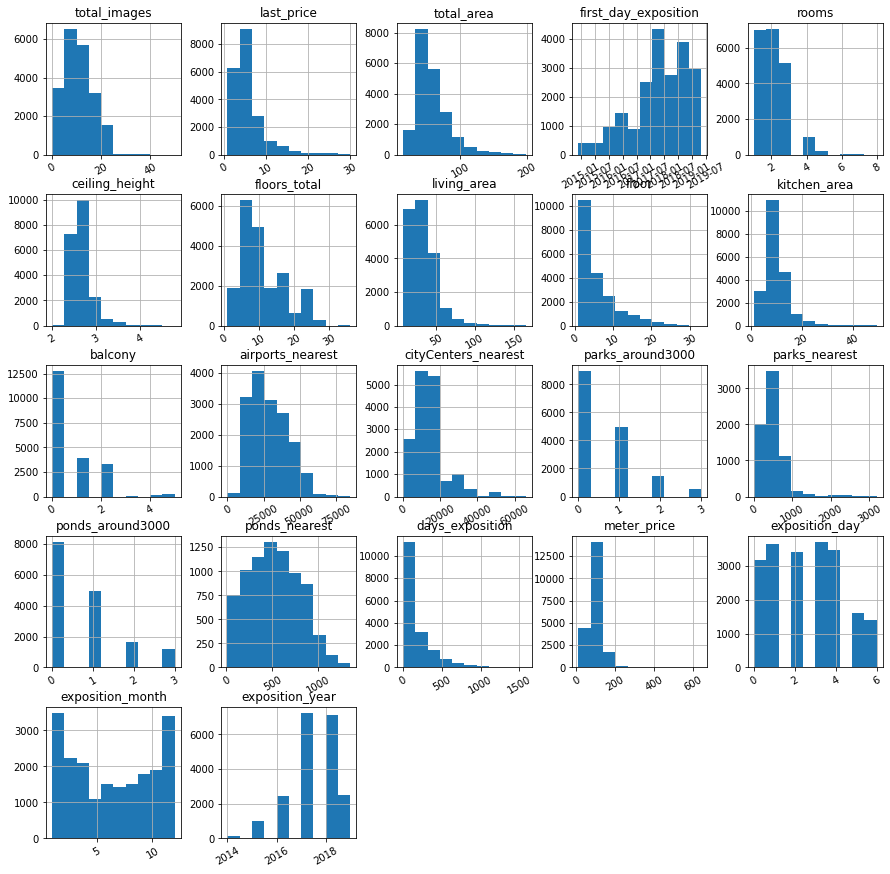

In [27]:
df.hist(figsize=(15,15), bins=10, xrot=30);

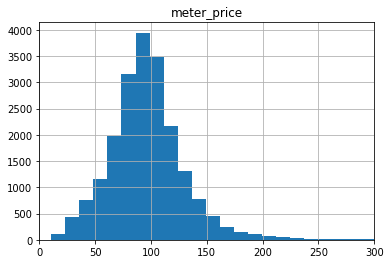

In [28]:
plt.figure(figsize=(15, 3))
plt.hist(df['meter_price'], bins=50)
plt.xlim(0,300)
plt.title('meter_price')
plt.grid()
plt.show()

In [29]:
df = df.query('30 < meter_price < 250')

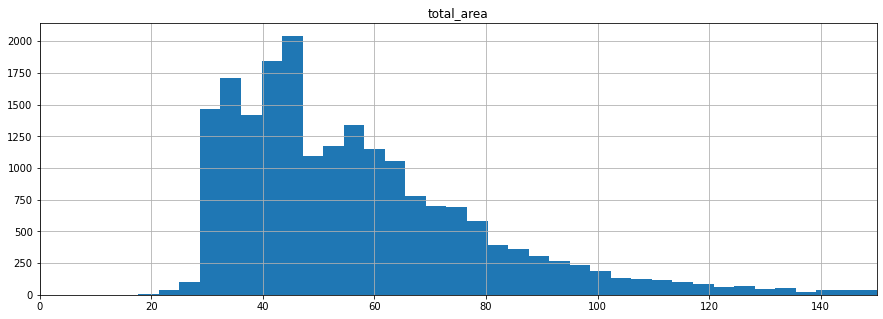

In [53]:
plt.figure(figsize=(15, 3))
plt.hist(df['total_area'], bins=50)
plt.xlim(0,150)
plt.title('total_area')
plt.grid()
plt.show()

Пики около 30-45 скорее всего приходятся на самые популярные метражи квартир.  
Поскольку в основном застройка в данных типовая, несколько пиков обоснованы.

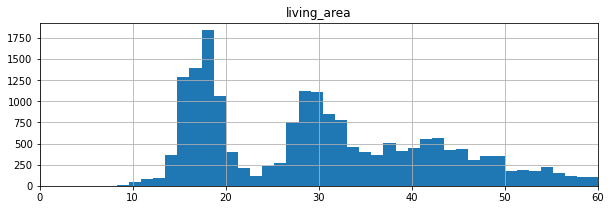

In [56]:
plt.figure(figsize=(10, 3))
plt.hist(df['living_area'], bins=120)
plt.title('living_area')
plt.xlim(0,60)
plt.grid()
plt.show()

Опять же несколько пиков на самых типовых площадях - 17 и 30 жилой площади.

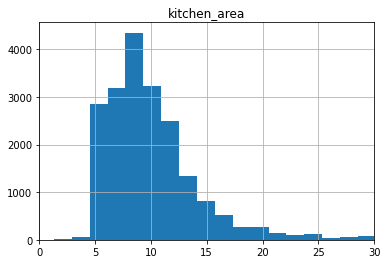

In [32]:
plt.hist(df['kitchen_area'], bins=30)
plt.title('kitchen_area')
plt.xlim(0,30)
plt.grid()
plt.show()

Самые популярные площади кухонь - 5-10 метров.

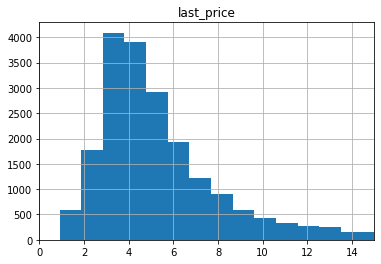

In [33]:
plt.hist(df['last_price'], bins=30)
plt.title('last_price')
plt.xlim(0,15)
plt.grid()
plt.show()

Большинство объектов продаются по цене в диапазоне 2-6 млн.

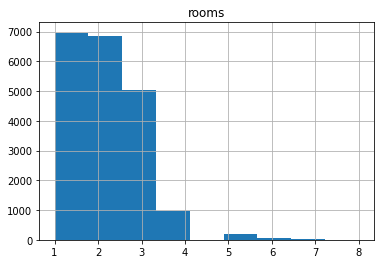

In [34]:
plt.hist(df['rooms'], bins=9)
plt.title('rooms')
plt.grid()
plt.show()

In [35]:
df.query('rooms < 4')['rooms'] .count()/df.shape[0]

0.9383213859020311

Квартиры с 1-3 комнатами имеют долю в 94% на рынке.

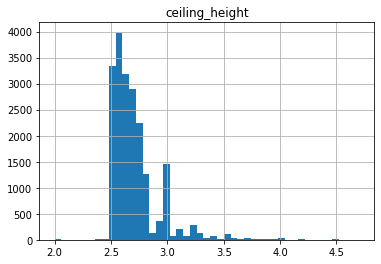

In [36]:
plt.hist(df['ceiling_height'], bins=45)
plt.title('ceiling_height')
plt.grid()
plt.show()

Большинство квартир имеют высоту потолков в 2,5-2,6 метров.

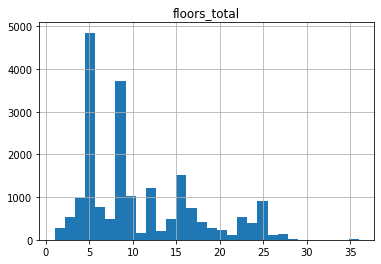

In [37]:
plt.hist(df['floors_total'], bins=30)
plt.title('floors_total')
plt.grid()
plt.show()

Самыми популярными ожидаемо оказались 5- и 9-этажки

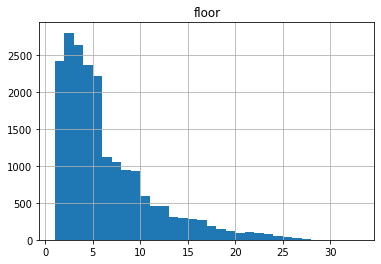

In [38]:
plt.hist(df['floor'], bins=32)
plt.title('floor')
plt.grid()
plt.show()

Подавлящее число объявлений об оъектах на 1-5 этаже. Логично, ведь они есть в любой многоэтажке, да и сами 5-этажные дома крайне популярны.

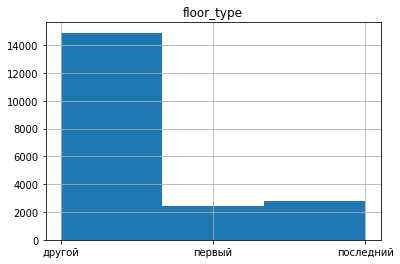

In [39]:
plt.hist(df['floor_type'], bins=3)
plt.title('floor_type')
plt.grid()
plt.show()

Квартиры на последнем этаже продают чуть чаще чем на первом, но большинство объявлений уместилось между ними.

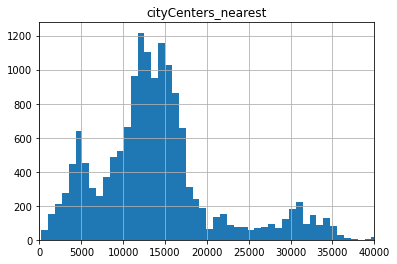

In [40]:
plt.hist(df['cityCenters_nearest'], bins=80)
plt.title('cityCenters_nearest')
plt.xlim(0,40000)
plt.grid()
plt.show()

Пик застройки (большинство сплальных районов) удалены от центра на 4-6, а также на 10-17км.  
Также в 30 км есть жилой район, видимый на этом графике.

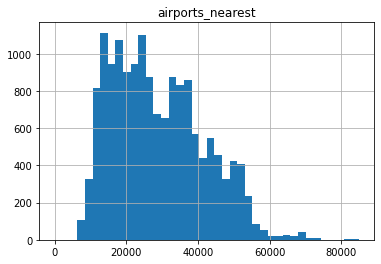

In [41]:
plt.hist(df['airports_nearest'], bins=40)
plt.title('airports_nearest')
plt.grid()
plt.show()

Объектов, подобравшихся к аэропорту ближе чем на 8 км. почти не видно. Еще бы.  
Остальные удалены почти равномерно. Интересно, что за пик в районе 35 км. Большие застроенные окраины дальше.

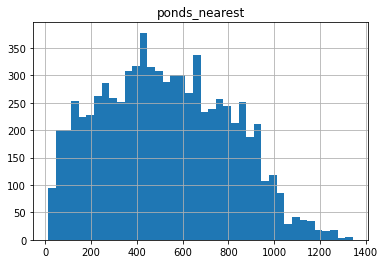

In [42]:
plt.hist(df['ponds_nearest'], bins=40)
plt.title('ponds_nearest')
plt.grid()
plt.show()

Как удивительно равномерно запружен Спб.  
Почти из любого места до ближайшего пруда будет менее километра!

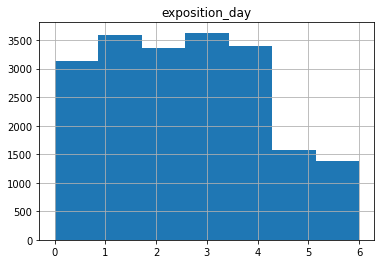

In [43]:
plt.hist(df['exposition_day'], bins=7)
plt.title('exposition_day')
plt.grid()
plt.show()

На выходных выкладывается почти в 2 раза меньше объявлений.   
Скорее всего дело в графике работы риелторских агентств. 

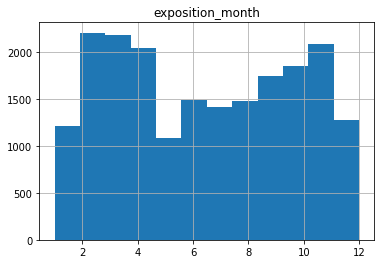

In [44]:
plt.hist(df['exposition_month'], bins=12)
plt.title('exposition_month')
plt.grid()
plt.show()

Реже всего продаются квартиры в новый год. Также почему-то проседает май.

Пики около 30-45 скорее всего приходятся на самые популярные метражи квартир.   
Поскольку в основном застройка в данных типовая, несколько пиков обоснованы. 
floors_total и living_area дают пики на отметках типовой застройки - 5 и 9 этаж, около 17 метров (возможно комнаты в коммунальных квартирах) и около 30 (типичная квартира-студия или однокомнатная).  
Самые популярные площади кухонь - 5-10 метров.
Большинство объектов продаются по цене в диапазоне 2-6 млн.
Квартиры с 1-3 комнатами имеют долю в 94% на рынке.
Большинство квартир имеют высоту потолков в 2,5-2,6 метров.
Самыми популярными домами ожидаемо оказались 5- и 9-этажки
Подавлящее число объявлений об оъектах на 1-5 этаже. Логично, ведь они есть в любой многоэтажке, да и сами 5-этажные дома крайне популярны.
Квартиры на последнем этаже продают чуть чаще чем на первом, но большинство объявлений уместилось между ними.
Пик застройки (большинство сплальных районов) удалены от центра на 4-6, а также на 10-17км.  
Объектов, подобравшихся к аэропорту ближе чем на 8 км. почти не видно.  
Почти из любого места до ближайшего пруда будет менее километра!
На выходных выкладывается почти в 2 раза меньше объявлений. Скорее всего дело в графике работы риелторских агентств. 
По exposition_month видим, что квартиры охотнее продают до и после новогодних месяцев (февраль-апрель и сентябрь-ноябрь)
Подозрительный хвост в meter_price от 250 до 700 тысяч за метр кв., обрубаем его

#### Изучим, как быстро продавались квартиры

<AxesSubplot:>

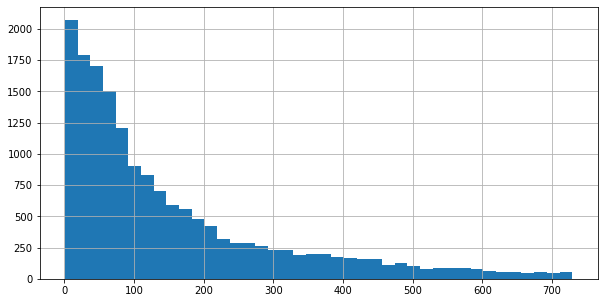

In [45]:
df.query('days_exposition < 730')['days_exposition'] .hist(bins=40, figsize=(10,5))

In [46]:
df['days_exposition'].describe()

count    17396.000000
mean       183.268453
std        219.651589
min          1.000000
25%         44.000000
50%        100.000000
75%        235.250000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

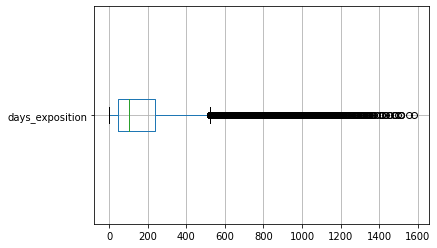

In [83]:
df.boxplot(column='days_exposition', vert=False)

<function matplotlib.pyplot.show(close=None, block=None)>

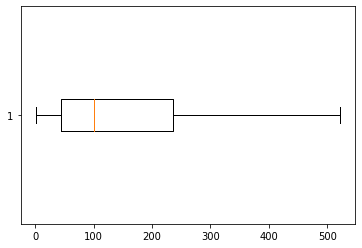

In [81]:
plt.boxplot(df['days_exposition'][df['days_exposition'].notna()], 0, '', vert=False)
plt.show

In [82]:
df['days_exposition'].describe()

count    17396.000000
mean       183.268453
std        219.651589
min          1.000000
25%         44.000000
50%        100.000000
75%        235.250000
max       1580.000000
Name: days_exposition, dtype: float64

По столбцу days_exposition среднее - 184, медиана - 101.  
Разница большая по причине выбросов (скорее всего объявлений, которые забыли удалить), которые начинаются примерно с 520.  
Продажи до первого квартиля (44 дня) можно назвать быстрыми, а больше 235 - долгими.


<AxesSubplot:>

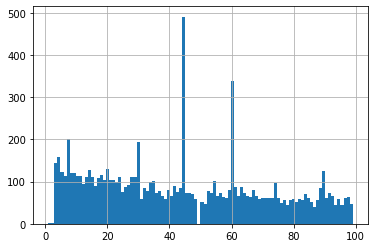

In [60]:
df.query('days_exposition<100') ['days_exposition'].hist(bins=100)

Могу предположить, что 45, 60 и 90 дней - стандартный срок публикации объявления.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

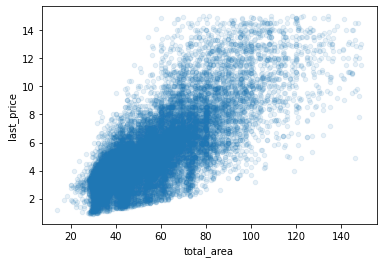

In [61]:
df.query('last_price < 15 and total_area < 150').plot(y='last_price', x='total_area', kind='scatter', alpha=0.1)

Заветная прямая корреляция. Аномалий не видно.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

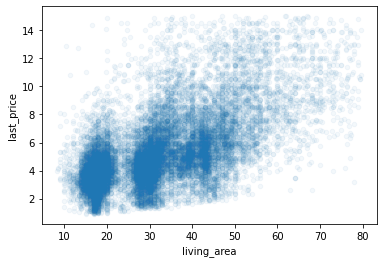

In [62]:
df.query('last_price < 15 and living_area < 80').plot(y='last_price', x='living_area', kind='scatter', alpha=0.05)

Помня про пики жилой площади около 17 и 30 кв.м., видим соответствующие сгусти на графике.  
В целом корреляция логичная, прямая: больше площадь - больше цена.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

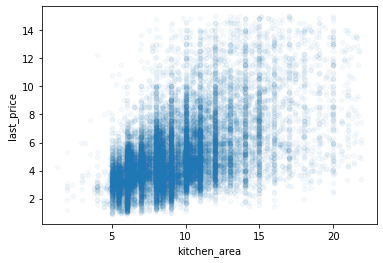

In [63]:
df.query('last_price < 15 and kitchen_area < 22').plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.04)


Кухонь меньше 5 метров практически не бывает, а корреляция с ценой похоже будет ниже, чем у жилой площади.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

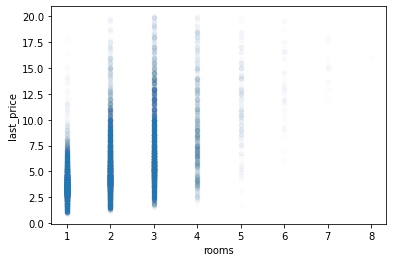

In [64]:
df.query('last_price < 20').plot(y='last_price', x='rooms', kind='scatter', alpha=0.01)


С количеством комнат растут столбики диаграммы  
Квартир с количеством комнат больше 5 почти не встречается

2017    7113
2018    6975
2019    2469
2016    2405
2015    1009
2014     117
Name: exposition_year, dtype: int64

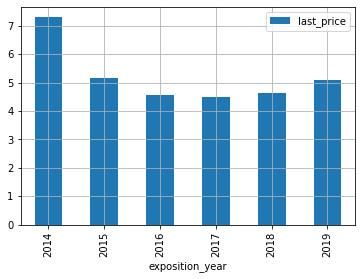

In [65]:
df_pivot = df.pivot_table(index='exposition_year', values='last_price', aggfunc='median')
df_pivot.plot.bar(grid=True)
df['exposition_year'].value_counts()

<AxesSubplot:xlabel='exposition_month'>

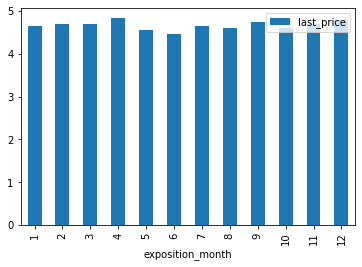

In [66]:
df_pivot = df.pivot_table(index='exposition_month', values='last_price', aggfunc='median')
df_pivot.plot.bar()


<AxesSubplot:xlabel='exposition_day'>

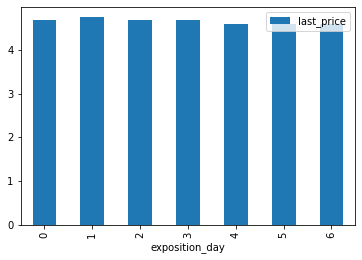

In [67]:
df_pivot = df.pivot_table(index='exposition_day', values='last_price', aggfunc='median')
df_pivot.plot.bar()


День недели и месяц практически никак не влияют на цену.  
Может показаться, что в 2014 году были очень высокие цены на недвижимость, но учитывая кол-во данных за этот год, опираться на них не стоит.  
В итоге можно лишь сказать, что цены растут с 2016 года.

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

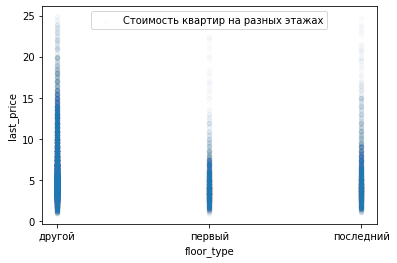

In [68]:
df.query('last_price < 25 and floors_total > 2').plot(y='last_price', x='floor_type', kind='scatter', 
                                                      alpha=0.01, label='Стоимость квартир на разных этажах')


Интерeсное наблюдение - квартиры на первом и последнем этажах гораздо реже, чем остальные, поднимаются в цене выше 10 млн. 

            last_price
floor_type            
другой            4.85
первый            4.10
последний         4.40


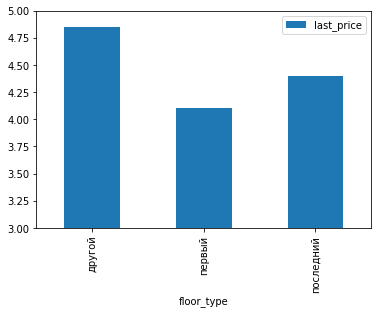

In [69]:
df_pivot = df.query('floors_total > 2') .pivot_table(index='floor_type', values='last_price', aggfunc='median')
df_pivot.plot.bar(ylim=(3,5))
print(df_pivot)                                         

Квартиры на первом этаже оцениваются в медианном значении почти на 800 тысяч дешевле, а на последнем - на 430.

<AxesSubplot:>

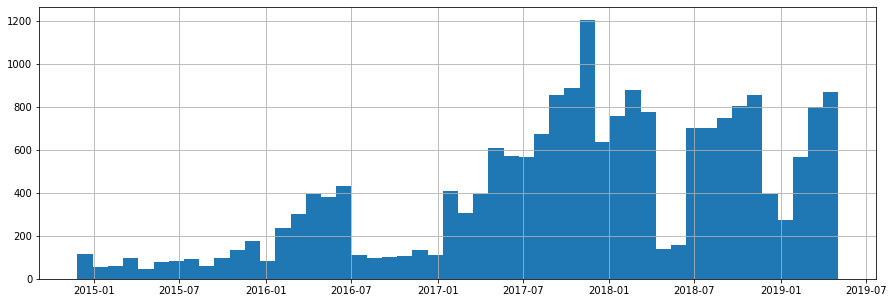

In [70]:
df['first_day_exposition'] .hist(bins=50, figsize=(15,5))

Видим существенный рост пиковых значений начиная с 2017, яндекс недвижимость тогда начала набирать обороты. 

<AxesSubplot:xlabel='meter_price', ylabel='last_price'>

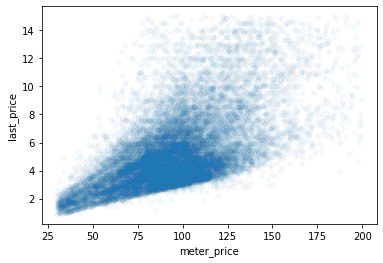

In [71]:
df.query('last_price < 15 and meter_price < 200').plot(y='last_price', x='meter_price', kind='scatter', alpha=0.03)


Вполне естественная корреляция, изогнутый вверх график говорит о склонности продавцов завышать стоимость объектов по сравнению  
со средними цифрами.

In [72]:
cor = df.corr()
cor['last_price'].sort_values(ascending=False)

last_price             1.000000
total_area             0.809104
living_area            0.694908
meter_price            0.650709
kitchen_area           0.597327
rooms                  0.526595
ceiling_height         0.434976
ponds_around3000       0.178695
parks_around3000       0.171811
total_images           0.157801
days_exposition        0.122044
floors_total           0.087808
floor                  0.085138
parks_nearest          0.049699
balcony                0.029860
exposition_month       0.001865
exposition_day        -0.015443
exposition_year       -0.029528
airports_nearest      -0.035216
ponds_nearest         -0.097044
cityCenters_nearest   -0.351459
studio                      NaN
open_plan                   NaN
Name: last_price, dtype: float64

Видим, что, естественно, стоимость объекта зависит в первую очередь от площади (полной, жилой, кухни), а также от кол-ва комнат. При этом видим обратную корреляцию с близостью к центру (чем больше расстояние - тем меньше цена).  
По остальным данным корреляция близка к нулевой.

In [73]:
df.groupby('locality_name')['meter_price'].agg(['count', 'mean']) \
        .nlargest(columns='count', n=10).sort_values(by = 'mean', ascending=False)

,count,mean
locality_name,,
санкт-петербург,13586,109.021409
пушкин,328,102.601232
кудрово,376,95.269612
парголово,288,90.756003
мурино,458,85.750546
петергоф,189,83.834914
шушары,392,78.393702
колпино,321,75.129845
гатчина,286,69.358800


Cамая высокая стоимость квадратного метра в СПб, Пушкине и Кудрово  
А самая низкая - в Выборге, Гатчине и Всеволожске   

cityCenters_kilo
0.0     127.620626
1.0     129.438404
2.0     125.248141
3.0     113.695517
4.0     121.417897
5.0     127.906005
6.0     128.224563
7.0     125.883287
8.0     121.898750
9.0     110.829599
10.0    110.973810
11.0    107.525706
12.0    107.308565
13.0    107.360447
14.0    103.506435
15.0    103.999925
16.0     99.882657
17.0     96.794511
18.0     96.783715
19.0     98.545200
20.0    100.657432
21.0     90.590215
22.0     89.631363
23.0     92.585367
24.0     84.552532
25.0     86.110991
26.0     84.614334
27.0    132.115709
28.0     81.161915
29.0     76.148690
Name: meter_price, dtype: float64


<AxesSubplot:xlabel='cityCenters_kilo', ylabel='meter_price'>

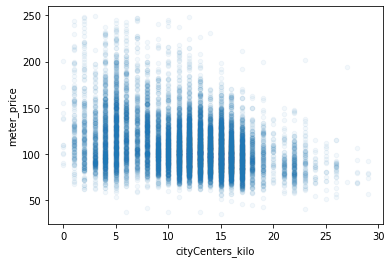

In [74]:
df.loc[:, 'cityCenters_kilo'] = round(df['cityCenters_nearest']/1000)
piter = df.query('locality_name == "санкт-петербург"')
print(piter.groupby('cityCenters_kilo')['meter_price'].mean())
piter.plot(x='cityCenters_kilo', y='meter_price', kind='scatter', alpha=0.05)

In [75]:
df.query('cityCenters_kilo==27')['meter_price'].round().value_counts(bins=10)

(62.868, 76.1]    20
(76.1, 89.2]      20
(102.3, 115.4]    20
(89.2, 102.3]     14
(115.4, 128.5]    11
(154.7, 167.8]     6
(128.5, 141.6]     2
(141.6, 154.7]     2
(180.9, 194.0]     1
(167.8, 180.9]     0
Name: meter_price, dtype: int64

Самыми дорогостоящими оказались объекты в 8км. от центра города.
Далее цена естественным образом снижается.
Интересно, что максимальное значение 132 тыс. за метр приходится на 27 км. от центра.
Предположу, что там находится элитный район или как минимум жилой комплекс.

### Общий вывод

- По exposition_month видим, что квартиры охотнее продают до и после новогодних месяцев (февраль-апрель и сентябрь-ноябрь)  

- А по first_day_exposition была пауза в конце 2016 г., которая вылилась в большой рост весь 2017.    

- floors_total даёт пики на отметках типовой застройки - 5 и 9 этаж.      

- А  living_area - около 17 метров (возможно комнаты в коммунальных квартирах) и около 30 (типичная квартира-студия или однокомнатная).  

- Больше всего распространена застройка квартир площадью 30-45 метров

- В среднем недвижимость продают 184 дня, медианное значение - 101.  

- Продажи до 44 дня можно назвать быстрыми, а больше 237 - долгими.

- Квартиры с 1-3 комнатами имеют долю в 94% на рынке.

- Кухонь меньше 5 метров практически не бывает, как и квартир с количеством комнат больше 5.

- Самые популярные площади кухонь - 6-7 и 10 метров.

- Пик застройки (большинство сплальных районов) удалены от центра на 8-18км. Также в 30 км есть жилой район, видимый на этом графике cityCenters_nearest.

- Объектов, подобравшихся к аэропорту ближе чем на 8 км. почти не видно. Остальные удалены почти равномерно.

- Почти из любого места в Спб до ближайшего пруда будет менее километра!

- Подавлящее число объявлений об оъектах на 1-5 этаже.

- Самыми популярными ожидаемо оказались 5- и 9-этажки

- Большинство квартир имеют высоту потолков в 2,5-2,6 метров.

- Большинство объектов продаются по цене в диапазоне 4-6 млн.

- Цены на недвижимость растут с 2016 года.

- День недели и месяц практически никак не влияют на цену.

- Квартиры на первом этаже оцениваются в медианном значении на 800 тысяч дешевле, а на последнем - на 340. Обе категории гораздо реже, чем "другие", поднимаются в цене выше 10 млн.  

- На выходных выкладывается почти в 2 раза меньше объявлений. Скорее всего дело в графике работы риелторских агентств.

- Реже всего выставляют объявления по январям, маям и декабрям.Но это практически не сказывается на цене.

- Продавцы склонны завышать стоимость объектов по сравнениюсо средними цифрами.



**Стоимость объекта зависит в первую очередь от площади (полной, жилой, кухни), а также от кол-ва комнат.  
При этом видим обратную корреляцию с близостью к центру (чем больше расстояние - тем меньше цена).**



- Cамая высокая стоимость квадратного метра в СПб, Пушкине и Кудрово. А самая низкая - в Выборге, Гатчине и Всеволожске.



- Самыми дорогостоящими оказались объекты в 8км. от центра города. Далее цена естественным образом снижается. Интересно, что максимальное значение 132 тыс. за метр приходится на 27 км. от центра. Предположу, что там находится элитный район или как минимум жилой комплекс.



*Рекомендация: заполнить большое кол-во пропусков в географических данных (расстояния до аэропорта, центра, парка, пруда, кол-во парков и прудов в 3000км.)*